# Mandatory Assignment 2

This is the last of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 11, 2023.**
* Should I work with my group?: **Yes**. In particular, you should **each hand in the same assignment per group and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from the exercise sets that you have solved so far, problems from the exercises that have been modified a little to better suit the structure of the assignment and finally also new problems not seen in the exercises. 

**Note**: 
- It is important that you submit your edited version of this [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. 
- **DON'T** delete the (possibly) empty non-editable cells below (most) questions. Those are tests used by the `nbgrader` software to grade the assignment.
- It is recommended to clone our [github repository](https://github.com/isdsucph/isds2023) and copy the entire `assignment2` folder to somewhere on your computer and complete the assignment in this folder.
- It is good practice to always restart your notebook and run all cells before submitting or delivering your notebook to somebody else. This is to make sure that all cells run without raising any errors breaking the flow of the notebook. 
- **Do not use absolute filepaths**. If you do this, your code will crash on other machines and we cannot grade the notebook. Use relative paths (e.g. `data/my_data.csv`) to load data or store results!

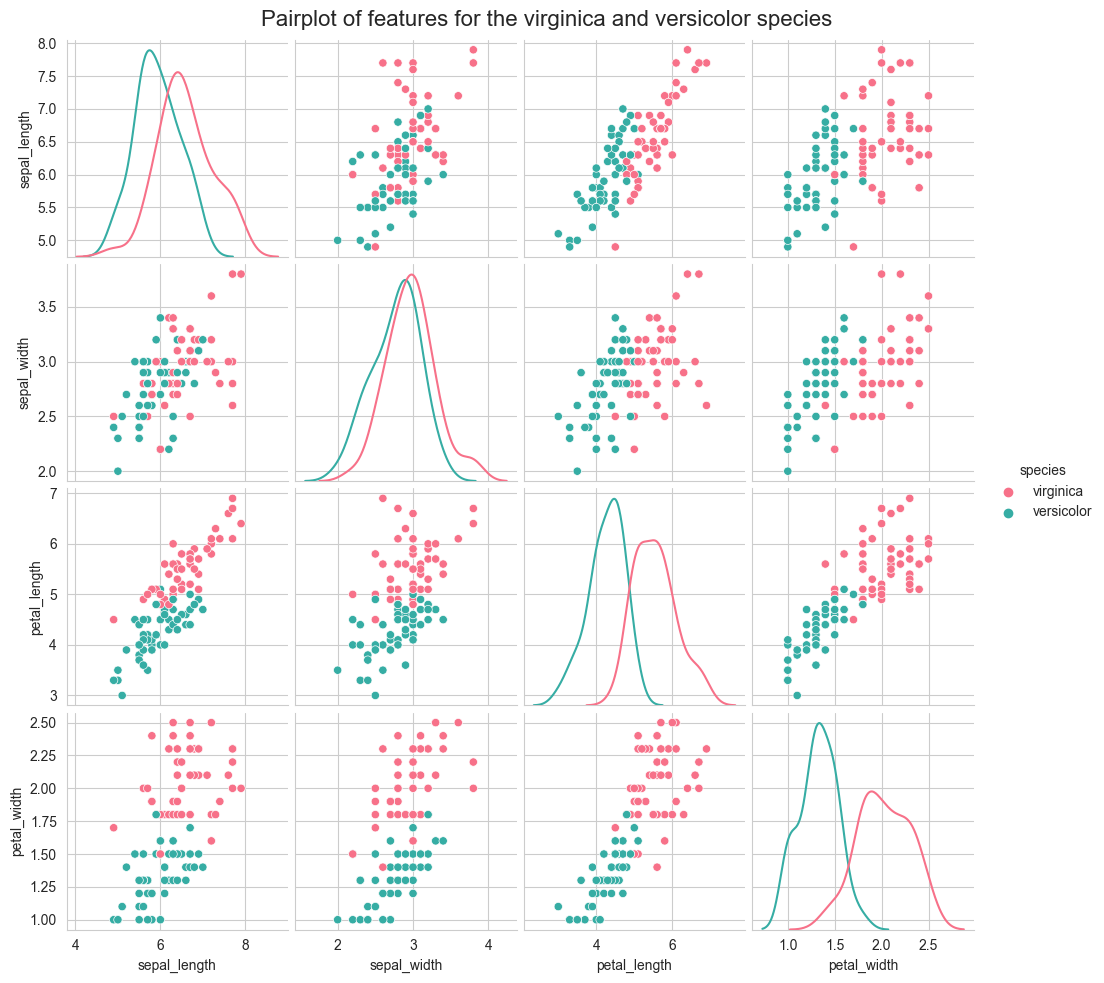

In [27]:
##############################################################
# RUN THIS CELL AND USE THE DATA TO SOLVE THE NEXT EXERCISES #
##############################################################

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

iris = sns.load_dataset('iris')
iris = (
    iris.query("species == 'virginica' | species == 'versicolor'")
    .sample(frac = 1, random_state = 3)
)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# EDA before modelling:
# Do the two species look perfectly linear seperable in any of the plots?
# (If they are not linear seperable the consequence is that the Perceptron algorithm
# won't converge, see Raschka's PML book)
ax = sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'fill': False})
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle('Pairplot of features for the virginica and versicolor species', fontsize=16)
plt.show()

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]

## Problems from Exercise Set 10:

> **Ex. 10.1.5:** Write a function named `perceptronEpoch` whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an `int` which is incremented whenever you update the weights. 
>
> You can complete the function with the docstring below if you like or just delete it and paste in your own.
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function perceptronEpoch(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus exercise (for 10.1.4), calculate the accuracy on training data using the updated weights as input in the predict function. Any progress yet?


You can use the following functions:

```python
def random_weights(location=0.0, scale=0.01, seed=1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size=1 + X.shape[1])
    
    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)
```

>
> Make sure your `perceptronEpoch` function takes the arguments `X, y, W, eta`.

In [28]:
def random_weights(X, location=0.0, scale=0.01, seed=1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size=1 + X.shape[1])
    
    return w

def net_input(X, w): 
    return np.dot(X, w[1:]) + w[0]   # Linear product X'W + bias


def predict(X, w):
    linProd = net_input(X, w)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)


def perceptronEpoch(X, y, w, eta=0.1):
    errors = 0
    for x_i, y_i in zip(X,y):
        temp = eta * (y_i - predict(x_i,w))
        w[1:] = w[1:] + temp * x_i
        w[0] = w[0] + temp
        errors = errors + int(temp != 0)
    return w, errors

def accuracy(y,y_hat):
    return np.mean(y == y_hat)

print(accuracy(ytrain, predict(Xtrain,random_weights(Xtrain))))


0.45714285714285713


> **Ex. 10.1.6:** Write a function named `Perceptron` which repeat the updating procedure (calls the function) you constructed in 10.1.5 for `n_iter` times by packing the whole thing in a loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph with the number of epochs along the x-axis and errors along the y-axis.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function Perceptron(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```

Please make sure that your function is named `Perceptron` and takes the arguments `X, y, n_iter, eta`


1.0


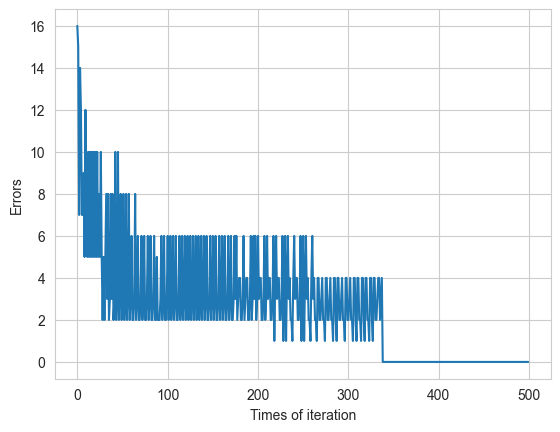

In [29]:
# YOUR CODE HERE
# raise NotImplementedError()
def Perceptron(X, y, n_iter, eta=0.1):
    weights = random_weights(X)
    errorseq = list()
    for i in range(n_iter):
        weights, e = perceptronEpoch(X,y,weights,eta)
        errorseq.append(e)
    return weights, errorseq

n_iter = 500
errorseq = []
[W_updated, errorseq] = Perceptron(Xtest,ytest,n_iter)
ytest_hat = predict(Xtest,W_updated)
pd.DataFrame(errorseq).plot(xlabel='Times of iteration', ylabel='Errors', legend=False)


print(accuracy(ytest, ytest_hat))

## Problems from Exercise Set 11:

### First part of Exercise Set 11: Implementing and evaluating the gradient decent for linear regression

In [30]:
##############################################################
# RUN THIS CELL AND USE THE DATA TO SOLVE THE NEXT EXERCISES #
##############################################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.exceptions import DataConversionWarning; import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips_num = pd.get_dummies(tips, drop_first=True)  # Get dummies 

# Define feature matrix X and target vector y 
X = tips_num.drop('tip', axis = 1)
y = tips_num['tip']


## NOTE: It is important that the random_state parameter is set equal to 1
# to ensure that the same sequence of random numbers are generated as in
# the solution notebook.

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=.5,
    random_state=1
)

# Standardize data - note that we only fit the standard scaler
# on X_train and use it on X_train, X_test.
norm_scaler = StandardScaler().fit(X_train) 
X_train = norm_scaler.transform(X_train) 
X_test = norm_scaler.transform(X_test) 

> **Ex. 11.1.5**: Make a function to update the weights given input target `y`, input features `X` and input weights `w` as well as learning rate, $\eta$, i.e. greek `eta`. Name the function `update_weight`. You should use matrix multiplication.


You can use the following functions inside `update_weight`:

```python
def net_input(X, w):    
    ''' Computes the matrix product between X and w. Note that
    X is assumed not to contain a bias/intercept column.'''
    # We have to add w_[0] separately because this is the constant term.
    # We could also have added a constant term to the X matrix to avoid
    # splitting the dot product up as below.
    return np.dot(X, w[1:]) + w[0]   
                                        

def compute_error(y, X, w):
    return y - net_input(X, w)
    
```

>
> Make sure your function takes the arguments `X, y, W, eta`.

In [31]:
# YOUR CODE HERE
# raise NotImplementedError()
def net_input(X, w):
    return np.dot(X, w[1:]) + w[0]

def compute_error(y, X, w):
    return y - net_input(X, w)

def update_weight(y, X, w, eta):
    e = compute_error(y, X, w)
    temp = eta * X.T.dot(e)
    w[1:] = w[1:] + temp
    w[0] = w[0] + eta * e.sum()
    return w

> **Ex. 11.1.6**: Use the code below to initialize the weights in the variable `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1 + X.shape[1])
```

In [32]:
# YOUR CODE HERE
# raise NotImplementedError()
w = np.zeros(1 + X_train.shape[1])
eta = 0.001

for i in range(50):
    w = update_weight(y_train, X_train, w, eta)

In [33]:
## This is a test cell, please don't delete it! 
## If it doesn't raise an error when run your code works!
assert round(np.sum(w)) == 4
assert any(np.round(w, 2) == [ 2.93,  0.89,  0.1 ,  0.07,  0.08,  0.05,  0.  , -0.04, -0.02])

### Third part of Exercise Set 11: Modelling houseprices
In this example we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), which also is to be found in `sklearn.datasets`. Kaggle is an organization that hosts competitions in building predictive models.

In [34]:
############################################################
#RUN THIS CELL AND USE THE DATA TO SOLVE THE NEXT EXERCISES#
############################################################

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()
X = pd.DataFrame(data=cal_house["data"], columns=cal_house["feature_names"]).iloc[
    :, :-2
]
y = cal_house["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1
)  # note random_state=1


> **Ex.11.3.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? Write 2 sentences. 
>
> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  Write 1 sentence. 
>
>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`
>
>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

Name you transformed training data set `X_train2` and your test data set `X_test2`

In [35]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

sc = StandardScaler()

print(f'There are {X.shape[1]} variables. There is too many variables, quadratic scaling using OLS is slow and prone to fail.\n')

max_degree = 3
degrees = range(max_degree+1)

test_mse = []
train_mse = []
parameters = []


for p in degrees:
    X_train_p = PolynomialFeatures(degree=p).fit_transform(X_train)
    X_test_p = PolynomialFeatures(degree=p).fit_transform(X_test)
    
    reg = LinearRegression().fit(X_train_p, y_train)
    
    train_mse.append(mse(reg.predict(X_train_p),y_train))
    test_mse.append(mse(reg.predict(X_test_p),y_test))
    parameters.append(reg.coef_)

X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print("\nYes, we should use the training data to rescale the test data.")


There are 6 variables. There is too many variables, quadratic scaling using OLS is slow and prone to fail.

Yes, we should use the training data to rescale the test data.


> **Ex.11.3.2**: Construct a list of 20 $\lambda$ values in the range from $10^{-4}$ to $10^4$ to be used in the Lasso model. For each $\lambda$ estimate the Lasso model on the rescaled train data, calculate the _Root Mean_ Squared Error (RMSE) for the rescaled train data, `X_train2`, and the _Root Mean_ Squared Error (RMSE) for the rescaled test data, `X_test2`. For each iteration store the given $\lambda$ and the calculated RMSEs for the rescaled train and test data in a list named `output`. 

> *Hint*: use `np.logspace(-4, 4, 20)` to create the list of lambdas to loop. 

> *Hint*: You can use the following code from scikit-learn to compute the _mean_ squared error.
```python
from sklearn.metrics import mean_squared_error as mse
mse(y_true, y_pred)
```

In [36]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import mean_squared_error as mse
from numpy import logspace

In [37]:
## This is a test cell, please don't delete it! 
## If it doesn't raise an error when run your code works!
assert any(np.sort(np.round(np.mean(output, axis=0))) == [1.0, 2.0, 806.0])

> **Ex.11.3.3**: Make a plot with the lambdas on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

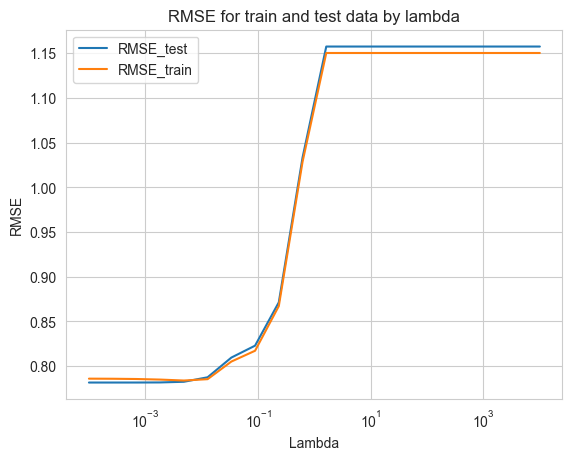

The RMSE rises for train and test data between around 0.01 and 1, but keeps staged elsewhere.

We are interested in minimizing the RMSE of test data.
The lambda that gives the lowest RMSE-test is 0.0001


In [38]:
# YOUR CODE HERE
raise NotImplementedError()

## Problems from Exercise Set 12:

> **Ex. 12.2.3:**
Run a Lasso regression using the Pipeline from `Ex 12.2.2` which is given in the code cell below. In the outer loop searching through the 12 lambda values as specified below. 
In the inner loop make *5 fold cross validation* on the selected model and store the average MSE for each fold. Which lambda, from the selection below, gives the lowest test MSE?
 ```python 
lambdas =  np.logspace(-4, 4, 12)
```
 *Hint:* `KFold` in `sklearn.model_selection` may be useful.

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso


# Given pipeline
pipe_lasso = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    Lasso(random_state=1),
)



# Splitting the data
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=(1 / 3), random_state=1)

lambdas = np.logspace(-4, 4, 12)

best_lambda = None
lowest_mse = float('inf')

for lmbd in lambdas:
    pipe_lasso.named_steps['lasso'].set_params(alpha=lmbd)  # Setting the lambda value
    
    mse_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kf.split(X_dev):
        X_train, X_val = X_dev.iloc[train_idx], X_dev.iloc[val_idx]
        y_train, y_val = y_dev[train_idx], y_dev[val_idx]
        
        pipe_lasso.fit(X_train, y_train)
        y_pred = pipe_lasso.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
    
    avg_mse = np.mean(mse_scores)
    
    if avg_mse < lowest_mse:
        lowest_mse = avg_mse
        best_lambda = lmbd

print(f"Best lambda: {best_lambda}, Lowest average MSE: {lowest_mse}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+03, tolerance: 1.477e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.253e+03, tolerance: 1.474e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best lambda: 0.01519911082952933, Lowest average MSE: 0.6378571129258432


## New problems in Assignment 2

> One of the fastest ways to extract and structure relevant information from text is by using regular expressions (regexes). In the following exercises we will leverage the power of regexes to extract relevant information from a text snippet of a meeting in the Danish parliament taken from [here](https://www.folketingstidende.dk/samling/20211/salen/M41/20211_M41_referat.pdf). 

> The text snippet is located in a txt file named `parliamentmeeting.txt` in the `data` folder inside this assignment repository. The snippet has been extracted from the pdf file using the `pdfreader` [package]([link](https://pdfreader.readthedocs.io/en/latest/)). The snippet consists of all text from page 2-4 (inclusive) of the original pdf file.
>
> Our goal is to extract all speakers with their corresponding speech from the text snippet. 
>
> **Ex. N.1**: Write a regex that matches 
> - The time that the speaker started to speak
> - A possible title in parenthesis
> - The name of the speaker
> - The political affiliation of the speaker
> - An ending colon
> 
>  from the strings in the list `TEST_STRINGS` defined below. The regex should be stored in a variable named `re_find_speakers`. 
> 
> 
> When applied to the strings in the list it should yield the output below:

```python
# Loop through each string and search for a match with the regex
for string in TEST_STRINGS:  
    print(re_find_speakers.search(string))
    
## Output:
# <re.Match object; span=(20, 68), match='Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):'>
# <re.Match object; span=(20, 63), match='Kl. 09:12Formanden (Henrik Dam Kristensen):'>
# <re.Match object; span=(20, 53), match='Kl. 09:12Troels Lund Poulsen (V):'>
# <re.Match object; span=(20, 63), match='Kl. 09:13Formanden (Henrik Dam Kristensen):'>
```
- *Hint 1:* To avoid drowning in regex expressions use the `re.VERBOSE` flag. This allows one to split a regex on multiple lines and write comments to each specific expression. See the Python regex tutorial [here](https://docs.python.org/3/howto/regex.html)
- *Hint 2:* [Capture groups and named capture groups](https://www.pythontutorial.net/python-regex/python-regex-capturing-group/) might be a help to organize your regex
- *Hint 3:* Consult [this](https://www.debuggex.com/cheatsheet/regex/python) cheatsheet for help

In [40]:
# Import the re module used to construct and use regexes in python
import re

In [41]:
TEST_STRINGS = [
    ", Socialdemokratiet.Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):Tak for det. For to ", 
    "det og glædelig jul.Kl. 09:12Formanden (Henrik Dam Kristensen):Ja, det varer lidt, ", 
    "nd Poulsen, Venstre.Kl. 09:12Troels Lund Poulsen (V):Tak for det. Tak for", 
    "r Socialdemokratiet?Kl. 09:13Formanden (Henrik Dam Kristensen):Ordføreren, værsgo.K", 
]

re_find_speakers = re.compile(r"""
    Kl\.\s+\d{2}:\d{2}             # Match the time (Kl. HH:MM)
    \(.*?\)?                       # Match a possible title in parenthesis
    (\w+\s+\w+\s+\w+)              # Match the name of the speaker (three words)
    \s+\(([A-Z]+)\)                # Match the political affiliation in parentheses
    :                              # Match the ending colon
""", re.VERBOSE)

# Loop through each string and search for a match with the regex
for string in TEST_STRINGS:
    print(re_find_speakers.search(string))

<re.Match object; span=(20, 68), match='Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):'>
None
None
None


In [42]:
## This is a test cell, please don't delete it! 
## If it doesn't raise an error when run your code works!

# Get matches for each test string
matches = [re_find_speakers.search(string) for string in TEST_STRINGS]

# Matched spans
spans = [match.span() for match in matches]
assert spans == [(20, 68), (20, 63), (20, 53), (20, 63)]

# Matched strings
matched_strings = [match.group(0) for match in matches]
assert matched_strings == [
    'Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):',
    'Kl. 09:12Formanden (Henrik Dam Kristensen):',
    'Kl. 09:12Troels Lund Poulsen (V):',
    'Kl. 09:13Formanden (Henrik Dam Kristensen):'
]

AttributeError: 'NoneType' object has no attribute 'span'

> **Ex. N.2**: Load the `parliamentmeeting.txt` file from the `data` folder into a variable named `parliament_meeting`. Next, apply your regex `re_find_speakers` to the text snippet stored in `parliament_meeting` using the `finditer` method of the regex. Use a list comprehension to store each match in a list named `meeting`. You should write something like:

```python
matches = [match for match in re_find_speakers.finditer(parliament_meeting)]
```

In [ ]:
# Load the content of the parliamentmeeting.txt file
with open('data/parliamentmeeting.txt', 'r', encoding='utf-8') as file:
    parliament_meeting = file.read()

# Apply the regex using finditer and store matches in the 'meeting' list
meeting = [match for match in re_find_speakers.finditer(parliament_meeting)]

In [ ]:
## This is a test cell, please don't delete it! 
## If it doesn't raise an error when run your code works!
matches = [match for match in re_find_speakers.finditer(parliament_meeting)]
spans = [match.span() for match in matches]
assert spans == [
    (61, 109),
    (8641, 8684),
    (8880, 8913),
    (9983, 10026),
    (10045, 10083),
    (11136, 11179),
    (11211, 11244),
    (12435, 12478),
    (12560, 12598),
    (13161, 13204),
    (13253, 13284),
    (14683, 14726),
    (14745, 14783),
    (16039, 16082),
    (16111, 16142),
    (16975, 17018),
    (17037, 17075),
    (17843, 17886),
    (17915, 17950),
    (18911, 18954),
    (18973, 19011),
    (20253, 20296),
]

names = [match.group() for match in matches]
assert names == [
    "Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):",
    "Kl. 09:12Formanden (Henrik Dam Kristensen):",
    "Kl. 09:12Troels Lund Poulsen (V):",
    "Kl. 09:13Formanden (Henrik Dam Kristensen):",
    "Kl. 09:14Christian Rabjerg Madsen (S):",
    "Kl. 09:15Formanden (Henrik Dam Kristensen):",
    "Kl. 09:15Troels Lund Poulsen (V):",
    "Kl. 09:16Formanden (Henrik Dam Kristensen):",
    "Kl. 09:16Christian Rabjerg Madsen (S):",
    "Kl. 09:16Formanden (Henrik Dam Kristensen):",
    "Kl. 09:16René Christensen (DF):",
    "Kl. 09:17Formanden (Henrik Dam Kristensen):",
    "Kl. 09:17Christian Rabjerg Madsen (S):",
    "Kl. 09:18Formanden (Henrik Dam Kristensen):",
    "Kl. 09:19René Christensen (DF):",
    "Kl. 09:19Formanden (Henrik Dam Kristensen):",
    "Kl. 09:19Christian Rabjerg Madsen (S):",
    "Kl. 09:20Formanden (Henrik Dam Kristensen):",
    "Kl. 09:20Lisbeth Bech-Nielsen (SF):",
    "Kl. 09:21Formanden (Henrik Dam Kristensen):",
    "Kl. 09:21Christian Rabjerg Madsen (S):",
    "Kl. 09:22Formanden (Henrik Dam Kristensen):",
]


> **Ex. N.3**: Use the matches in the list `matches` to extract the speech of each speaker. You can store the result in a data structure of your choice. For example, you could store each speaker and the corresponding speech as a list of tuples. Finally, print out each speaker and the corresponding speech. Ideally, you should get an output akin to the one in the screenshot shown in the cell below.

> - *Hint 1:* You can locate each speaker in the text snippet stored in `parliament_meeting` by writing `match.span()` on each match and subsetting `parliament_meeting` by the indices returned. I.e. the first match returns the tuple `(61, 109)` when computing `matches[0].span()`. This means that the place in the original text where our regex found a match can be found from index `61` to `109` of the text snippet. See the code snippet below
```python
start_idx, end_idx = matches[0].span()  # (61, 109)
print(parliament_meeting[start_idx:end_idx])
## Output
# Kl. 09:03(Ordfører)Christian Rabjerg Madsen (S):
```
> - *Hint 2:* To find the first speaker's speech locate the next speaker in the text and extract all text starting from the first speaker until the next speaker. Repeat this for all pairs.

In [ ]:
# Display example of printout
from IPython.display import Image
Image("parliament-meeting-printout.png", width=800)

In [ ]:
# Initialize a list to store speaker-speech pairs
speaker_speech_pairs = []

# Iterate through the matches to extract speaker-speech pairs
for i, match in enumerate(meeting):
    start_idx, end_idx = match.span()
    
    # Determine the range of text containing the current speaker's speech
    if i < len(meeting) - 1:
        next_start_idx, _ = meeting[i + 1].span()
        speech_range = parliament_meeting[end_idx:next_start_idx]
    else:
        speech_range = parliament_meeting[end_idx:]
    
    speaker_speech_pairs.append((parliament_meeting[start_idx:end_idx], speech_range.strip()))

# Print each speaker and their corresponding speech
for speaker, speech in speaker_speech_pairs:
    print("Speaker:", speaker)
    print("Speech:", speech)
    print("=" * 50)  # Separation line for clarity